<a href="https://colab.research.google.com/github/ywan1416/MAT422/blob/main/HW_3_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import sympy as sp
import matplotlib.pyplot as plt

# 3.4. Logistic regression

Logit function: The logit function models the probability as a linear regression. It transforms the odds of the event into a linear combination of the input features.

Sigmoid function: The sigmoid function limits the output between 0 and 1, representing the probability. It uses the formula p(α;x)=σ(α^Tx), where σ is the sigmoid function.

Objective function: The objective function uses cross-entropy loss to minimize the error, allowing us to find the optimal solution x.

Gradient descent: Gradient descent is applied to minimize the loss function, leading to the optimal x by iteratively updating the parameters based on the computed gradients.

In [7]:
# Def Sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [8]:
# Def Objective function
def compute_cost(X, y, theta):
    m = len(y)
    h = sigmoid(np.dot(X, theta))
    epsilon = 1e-5  # small value to avoid log(0)
    cost = -(1/m) * np.sum(y * np.log(h + epsilon) + (1 - y) * np.log(1 - h + epsilon))
    return cost

In [9]:
# Def Gradient Descent
def gradient_descent(X, y, theta, alpha, iterations):
    m = len(y)
    cost_history = []

    for i in range(iterations):
        h = sigmoid(np.dot(X, theta))
        gradient = np.dot(X.T, (h - y)) / m
        theta = theta - alpha * gradient
        cost = compute_cost(X, y, theta)
        cost_history.append(cost)

    return theta, cost_history

Learned parameters: [-0.87536641  0.05256356]


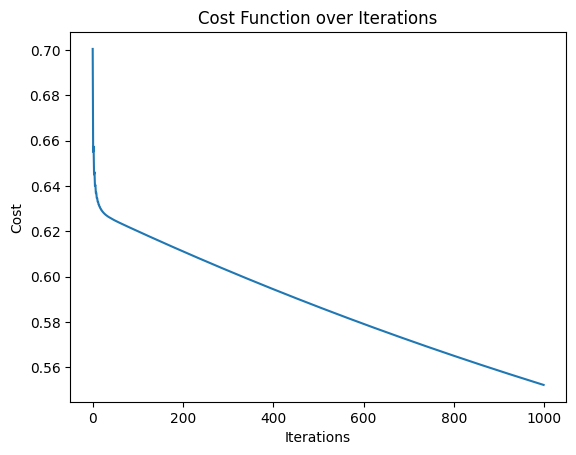

Probability of passing for 30 hours studied: 0.6685292202597521


In [16]:
# Def x as hours studied data and y as Result: Pass(1)/Fail(0)
hours_studied = np.array([29, 15, 33, 28, 39, 44, 31, 19, 9, 24, 32, 31, 37, 35])
results = np.array([0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1])

X = np.c_[np.ones(hours_studied.shape[0]), hours_studied]
y = results
theta = np.zeros(X.shape[1])
learning_rate = 0.01
iterations = 1000
theta, cost_history = gradient_descent(X, y, theta, learning_rate, iterations)
print("Learned parameters:", theta)

#Plot Cost Function vs Iterations
costs = cost_history
plt.plot(range(iterations), costs)
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.title("Cost Function over Iterations")
plt.show()

# probability of passing for someone who studied 30 hours
hours_new = 30
X_new = np.array([1, hours_new])
probability = sigmoid(np.dot(X_new, theta))
print(f"Probability of passing for 30 hours studied: {probability}")